In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import requests
import json
from datetime import date, timedelta
from numpy import array
import pandas as pd
import nltk
from nltk.probability import FreqDist
from datetime import date, timedelta, datetime

import re, string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) 

stop_add=['con','com','media','excelsior','amp','ref','mx','5etfw','data','img']

for i in range(0,len(stop_add)):
    stop_words.add(stop_add[i])


#dfnotas = pd.read_csv('EXCELSIOR_ENERO_SEPTIEMBRE.csv')
dfnotas = pd.read_csv('Salud180.csv')
#dfnotas = pd.read_csv('NOTAS_EXCELSIOR_ENERO.csv')

#dfnotas = dfnotas.fillna(0)

[nltk_data] Downloading package stopwords to C:\Users\Diego
[nltk_data]     Esteva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#ELIMINA NOTAS SIN PVS
nulos=[]

#dfnotas['Número de vistas de página']=dfnotas['Número de vistas de página'].astype(int)
dfnotas = dfnotas.fillna(0)

for i in range(0,len(dfnotas.index)):
    if dfnotas.iloc[i]['Número de vistas de página'] == 0:
        nulos.append(i)

for i in range(0,len(nulos)):        
    dfnotas=dfnotas.drop(nulos[i])

dfnotas

,sitio,created,title,Fecha,Hora,url,editor,tags,cuerpo,Número de vistas de página
0,salud180,"15 feb 2022, 23:19:22","68: la postura ""más ardiente"" del Kamasutra qu...",2022-02-15,18:19:22,https://www.salud180.com/bienestar180/68-la-po...,María Hernández Vera,_sexualidad_salud sexual_pareja_placer femenino,<p>Se vale disfrutar nuevas cosas en el sexo y...,315770.0
1,salud180,"3 ene 2022, 19:38:32",La dieta de 1200 calorías del Dr. Nowzaradan e...,2022-01-03,14:38:32,https://www.salud180.com/nutricion-y-ejercicio...,Diana Oliva,_dieta_perder peso_bajar de peso_dieta 1200_ca...,<p>Si algo nos ha dejado esta “infinita” cuare...,216085.0
2,salud180,"25 may 2022, 14:07:50",Truco fácil y económico para destapar los aguj...,2022-05-25,9:07:50,https://www.salud180.com/salud-dia-a-dia/como-...,Diana Oliva,_regadera_coladera_tips de limpieza_limpiar re...,"<p dir=""ltr""><strong>¿Los agujeros de tu regad...",165630.0
3,salud180,"3 ene 2022, 18:50:02",Cómo usar el vinagre en tu jardín para benefic...,2022-01-03,13:50:02,https://www.salud180.com/salud-dia-a-dia/como-...,María Hernández Vera,_plantas_cuidado de las plantas_plagas en las ...,<p><strong>Una de las sustancias con mejores p...,152063.0
4,salud180,"12 jul 2022, 20:12:49",Cómo eliminar el óxido de las puertas y ventan...,2022-07-12,15:12:49,https://www.salud180.com/salud-dia-a-dia/como-...,Nancy Polvo Rosales,_Por qué se oxidan las ventanas_por qué se oxi...,"<p dir=""ltr""><span id=""docs-internal-guid-e493...",145630.0
...,...,...,...,...,...,...,...,...,...,...
1726,salud180,"28 sept 2022, 17:36:00",Niños que comen más rápido tienen más riesgo d...,2022-09-28,12:36:00,https://www.salud180.com/salud-dia-a-dia/ninos...,Diana Oliva,_niños que comen más rápido_obesidad_infancia_...,<p><strong>¿Por qué los niños que comen más rá...,37.0
1727,salud180,"29 sept 2022, 23:46:53",Retrasar los signos de envejecimiento…. ¡Sí es...,2022-09-29,18:46:53,https://www.salud180.com/enforma180/retrasar-l...,Editorial Salud180,_FACEUP_clínica estética_armonización facial_T...,"<p dir=""ltr""><span id=""docs-internal-guid-9974...",37.0
1728,salud180,"4 ene 2022, 23:10:36",¿Qué es el acitrón? Por qué está prohibido en ...,2022-01-04,18:10:36,https://www.salud180.com/nutricion-y-ejercicio...,Marisela Valencia Tapia,_cocina_recetas_curiosidades_hábitos saludables,<p>El acitrón es un dulce tradicional mexicano...,37.0
1729,salud180,"3 jun 2022, 19:39:07",Prometedor fármaco que ralentiza el progreso d...,2022-06-03,14:39:07,https://www.salud180.com/salud-dia-a-dia/prome...,Salud180.com,_cáncer_medicamento_linfoma_cáncer extraño_not...,"<p>De acuerdo a la<a href=""https://www.cancer....",37.0


In [4]:
def limpiar_texto(texto):

    link_eliminar=[]
    link_ubi=[]
    acum=[]
    
    for i in range (0,len(texto)):  #Busca la posicion en el texto de los "<" y ">" 
        if '<' == texto[i]:
            link_ubi.append(i)
            
        elif  '>' == texto[i]:
            link_ubi.append(i)
            
            link_eliminar.append(link_ubi)
            link_ubi=[]
              
  #  print(link_eliminar)
    for i in range (0,len(link_eliminar)):  #recuperar lo que esta dentro de "<" y ">"(indexaciones,links,codigos,etc) y mete ese texto en una lista
        textoaux=texto[(link_eliminar[i])[0]:(link_eliminar[i])[1]+1]
        acum.append(textoaux)
    
    for i in range(0,len(acum)): #elimina todas las coincidencias de la lista que creamos en el ciclo anterior
        texto=texto.replace(acum[i],"")  
    
    return texto

In [5]:
def eliminar_caracteresesp(texto):

#    link_eliminar=[]
#    link_ubi=[]
#    acum=[]
#    
#    for i in range (0,len(texto)):  #Busca la posicion en el texto de los "<" y ">" 
#        if '<' == texto[i]:
#            link_ubi.append(i)
#            
#        elif  '>' == texto[i]:
#            link_ubi.append(i)
#            
#            link_eliminar.append(link_ubi)
#            link_ubi=[]
#              
#  #  print(link_eliminar)
#    for i in range (0,len(link_eliminar)):  #recuperar lo que esta dentro de "<" y ">"(indexaciones,links,codigos,etc) y mete ese texto en una lista
#        textoaux=texto[(link_eliminar[i])[0]:(link_eliminar[i])[1]+1]
#        acum.append(textoaux)
#    
#    for i in range(0,len(acum)): #elimina todas las coincidencias de la lista que creamos en el ciclo anterior
#        texto=texto.replace(acum[i],"")  
    
    
    texto=texto.lower()    #Hace minusculas todas las letras del cuerpo

    texto=re.sub('[%s]' % re.escape(string.punctuation), ' ', texto) #Elimina puntuacion

    auxtexto=nltk.word_tokenize(texto)
    auxtexto2=[]  

    for w in auxtexto:  #Elimina articulos gramaticales
        if w not in stop_words: 
            auxtexto2.append(w)
    return auxtexto2



In [31]:
#dfnotas.iloc[2]['cuerpo']

In [6]:
no_palabras_titulo=[]
repetidas=[]
no_palabras_cuerpo=[]
no_letras_url=[]
diccionario_frecuencias = {}
mas_repetidasaux=''
mas_repetidas=[]
vocabulario_cuerpo =[]
frecuentes_cuerpo=[]
nuevo_cuerpo=[]
TieneKeyValue=[]
CountTags=[]
CountParrafos=[]
CountLinks=[]
CountImagenes=[]


#Convierte los datos en tipo necesario
dfnotas['title']=dfnotas['title'].astype(str) 
dfnotas['cuerpo']=dfnotas['cuerpo'].astype(str)
dfnotas['tags']=dfnotas['tags'].astype(str)
#dfnotas['Fecha'] = pd.to_datetime(dfnotas['Fecha'], format="%d/%m/%Y")

for i in range(0,len(dfnotas.index)):

    titulo=dfnotas.iloc[i]['title'] #recorre los titulos del dt por fila
    cuerpo=dfnotas.iloc[i]['cuerpo']

    tokens_titulo = nltk.word_tokenize(titulo) #separa el titulo por palabras
    
    no_letras_url.append(len(dfnotas.iloc[i]['url']))
    no_palabras_titulo.append(len(tokens_titulo))  #agrega a la lista la cantidad de palabras de cada titulo
    

    
    CountParrafos.append(dfnotas.iloc[i]['cuerpo'].count("<p>")-4)
    CountImagenes.append(dfnotas.iloc[i]['cuerpo'].replace('Images','').count("Image"))#Cuenta la cantidad de parrafos (-4 es por los parrafos que siempre estan implicitos en las notas)
    CountLinks.append(dfnotas.iloc[i]['cuerpo'].count("<a")) #Cuenta cantidad de links
    
    for palabra in tokens_titulo:                   #Agrega todas las palabras que se repitan mas de dos veces en el titulo
        if palabra in diccionario_frecuencias:
            diccionario_frecuencias[palabra] += 1
        else:
            diccionario_frecuencias[palabra] = 1

    for palabra in diccionario_frecuencias:
        frecuencia = diccionario_frecuencias[palabra]
    
        if frecuencia >= 2 : 
            mas_repetidas.append(palabra)
            mas_repetidasaux=mas_repetidasaux+palabra+","
    
    repetidas.append(mas_repetidas)
    mas_repetidas=[]
    diccionario_frecuencias = {}
    
    
    
######################################################################
#CONTEO DE TAGS
    
    if (dfnotas.iloc[i]['tags']) != 0 :
        TieneKeyValue.append('Si')
        CountTags.append(dfnotas.iloc[i]['tags'].count("_")+1) #cuantos Tags hay en la notas
        
    else:
        #TagsEsp.append("Null")
        CountTags.append(0)
        TieneKeyValue.append('No')
    
#####################################
#CONTEO DE PALABRAS FRECUENTES    

    cuerpo=limpiar_texto(cuerpo)
    cuerpo=cuerpo.replace('\n','')
 #   cuerpo=cuerpo.replace('\xa','')
    nuevo_cuerpo.append(cuerpo)
    
    tokens_cuerpo = nltk.word_tokenize(cuerpo) #separa el cuerpo por palabras
    
    no_palabras_cuerpo.append(len(tokens_cuerpo))
    vocabulario_cuerpo.append(set(tokens_cuerpo))

    auxcuerpo2=eliminar_caracteresesp(cuerpo)

        
    frecuentes_cuerpo.append(FreqDist(auxcuerpo2).most_common(10)) #crea una lista con las 10 palabras mas frecuente del cuerpo y su no. de repeticiones

#Se añaden columnas con las nuevas metricas

dfnotas['cuerpo']=nuevo_cuerpo
dfnotas['No.Letras_Url']=no_letras_url                  #cantidad de letras en url
dfnotas['No.Palabras_Titulo']=no_palabras_titulo        #Cantidad de palabras en el titulo
dfnotas['Mas_Frecuentes_Titulo']=repetidas              #Palabras mas frecuentes en el titulo
dfnotas['No.Palabras_Cuerpo']=no_palabras_cuerpo        #Cantidad de palabras en el cuerpo de la nota
dfnotas['No.Parrafos']=CountParrafos                    #Cantidad de parrafos en el cuerpo
dfnotas['No.Links']=CountLinks                          #Cantidad de de links en la nota
dfnotas['No.Imagenes']=CountImagenes
dfnotas['Vocabulario_Cuerpo']=vocabulario_cuerpo        #Vocabulario usado en el cuerpo
#dfnotas['Mas_Frecuentes_Cuerpo ']=frecuentes_cuerpo     #Palabras mas frecuente en el cuerpo
dfnotas['Tiene_Tags']=TieneKeyValue                     #Dice se pusieron tags o no en la nota
dfnotas['No.Tags']=CountTags                            #Cantidad de tags en la nota

dfnotas


,sitio,created,title,Fecha,Hora,url,editor,tags,cuerpo,Número de vistas de página,No.Letras_Url,No.Palabras_Titulo,Mas_Frecuentes_Titulo,No.Palabras_Cuerpo,No.Parrafos,No.Links,No.Imagenes,Vocabulario_Cuerpo,Tiene_Tags,No.Tags
0,salud180,"15 feb 2022, 23:19:22","68: la postura ""más ardiente"" del Kamasutra qu...",2022-02-15,18:19:22,https://www.salud180.com/bienestar180/68-la-po...,María Hernández Vera,_sexualidad_salud sexual_pareja_placer femenino,Se vale disfrutar nuevas cosas en el sexo y sa...,315770.0,124,25,[],461,8,5,1,"{Se, postura, Journal, acceso, Meré.Lo, como, ...",Si,5
1,salud180,"3 ene 2022, 19:38:32",La dieta de 1200 calorías del Dr. Nowzaradan e...,2022-01-03,14:38:32,https://www.salud180.com/nutricion-y-ejercicio...,Diana Oliva,_dieta_perder peso_bajar de peso_dieta 1200_ca...,Si algo nos ha dejado esta “infinita” cuarente...,216085.0,125,21,"[de, sí]",397,6,4,1,"{crear, etapa, &, azúcares, a, iStock¿En, Virg...",Si,9
2,salud180,"25 may 2022, 14:07:50",Truco fácil y económico para destapar los aguj...,2022-05-25,9:07:50,https://www.salud180.com/salud-dia-a-dia/como-...,Diana Oliva,_regadera_coladera_tips de limpieza_limpiar re...,¿Los agujeros de tu regadera están tapados? Si...,165630.0,81,11,[],294,-3,1,3,"{crear, liga, calcio, gran, como, enjabonada, ...",Si,12
3,salud180,"3 ene 2022, 18:50:02",Cómo usar el vinagre en tu jardín para benefic...,2022-01-03,13:50:02,https://www.salud180.com/salud-dia-a-dia/como-...,María Hernández Vera,_plantas_cuidado de las plantas_plagas en las ...,Una de las sustancias con mejores propiedades ...,152063.0,122,15,[],479,11,3,1,"{vegetación, raíces, como, Unidas, microplasma...",Si,4
4,salud180,"12 jul 2022, 20:12:49",Cómo eliminar el óxido de las puertas y ventan...,2022-07-12,15:12:49,https://www.salud180.com/salud-dia-a-dia/como-...,Nancy Polvo Rosales,_Por qué se oxidan las ventanas_por qué se oxi...,La temporada de lluvias no solo trae problemas...,145630.0,123,15,[],715,-1,6,3,"{centímetros, convertirse, vierte, capaz, hubi...",Si,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,salud180,"28 sept 2022, 17:36:00",Niños que comen más rápido tienen más riesgo d...,2022-09-28,12:36:00,https://www.salud180.com/salud-dia-a-dia/ninos...,Diana Oliva,_niños que comen más rápido_obesidad_infancia_...,¿Por qué los niños que comen más rápido tienen...,37.0,105,12,[más],389,8,4,1,"{Journal, como, gran, a, lentamente, inversame...",Si,6
1727,salud180,"29 sept 2022, 23:46:53",Retrasar los signos de envejecimiento…. ¡Sí es...,2022-09-29,18:46:53,https://www.salud180.com/enforma180/retrasar-l...,Editorial Salud180,_FACEUP_clínica estética_armonización facial_T...,Si bien el alza en la demanda de armonización ...,37.0,87,10,[],342,1,5,0,"{demanda, Se, acceso, quiere, como, excesiva, ...",Si,18
1728,salud180,"4 ene 2022, 23:10:36",¿Qué es el acitrón? Por qué está prohibido en ...,2022-01-04,18:10:36,https://www.salud180.com/nutricion-y-ejercicio...,Marisela Valencia Tapia,_cocina_recetas_curiosidades_hábitos saludables,El acitrón es un dulce tradicional mexicano qu...,37.0,115,17,[],828,41,6,0,"{centímetros, dice, frutas, vas, indispensable...",Si,5
1729,salud180,"3 jun 2022, 19:39:07",Prometedor fármaco que ralentiza el progreso d...,2022-06-03,14:39:07,https://www.salud180.com/salud-dia-a-dia/prome...,Salud180.com,_cáncer_medicamento_linfoma_cáncer extraño_not...,"De acuerdo a la American Cancer Society, una d...",37.0,108,14,[J],380,9,3,1,"{&, práctica, como, fármaco, combinación, está...",Si,6


In [41]:
dfnotas=dfnotas.drop(0)
dfnotas.head()

,sitio,created,title,Fecha,Hora,url,editor,tags,cuerpo,Número de vistas de página,...,No.Palabras Titulo,Mas Frecuentes Titulo,No.Palabras Cuerpo,No.Parrafos,No.Links,No.Imagenes,Vocabulario Cuerpo,Mas Frecuentes Cuerpo,Tiene Tags,No.Tags
1,salud180,"3 ene 2022, 19:38:32",La dieta de 1200 calorías del Dr. Nowzaradan e...,2022-01-03,14:38:32,https://www.salud180.com/nutricion-y-ejercicio...,Diana Oliva,_dieta_perder peso_bajar de peso_dieta 1200_ca...,Si algo nos ha dejado esta “infinita” cuarente...,216085.0,...,21,"[de, sí]",397,6,4,1,"{unos, cuantos, personas, Younan, comida, FOTO...","[(“, 5), (”, 5), (dieta, 5), (kilos, 4), (dr, ...",Si,9
2,salud180,"25 may 2022, 14:07:50",Truco fácil y económico para destapar los aguj...,2022-05-25,9:07:50,https://www.salud180.com/salud-dia-a-dia/como-...,Diana Oliva,_regadera_coladera_tips de limpieza_limpiar re...,¿Los agujeros de tu regadera están tapados? Si...,165630.0,...,11,[],294,-3,1,3,"{trasera, uniforme, como, cuando, acumulado, d...","[(bolsa, 4), (agujeros, 3), (si, 3), (foto, 3)...",Si,12
3,salud180,"3 ene 2022, 18:50:02",Cómo usar el vinagre en tu jardín para benefic...,2022-01-03,13:50:02,https://www.salud180.com/salud-dia-a-dia/como-...,María Hernández Vera,_plantas_cuidado de las plantas_plagas en las ...,Una de las sustancias con mejores propiedades ...,152063.0,...,15,[],479,11,3,1,"{proporciona, infecciosos, muchos, como, remed...","[(vinagre, 9), (plantas, 7), (gracias, 5), (ag...",Si,4
4,salud180,"12 jul 2022, 20:12:49",Cómo eliminar el óxido de las puertas y ventan...,2022-07-12,15:12:49,https://www.salud180.com/salud-dia-a-dia/como-...,Nancy Polvo Rosales,_Por qué se oxidan las ventanas_por qué se oxi...,La temporada de lluvias no solo trae problemas...,145630.0,...,15,[],715,-1,6,3,"{como, ventanas, truco, donde, cola, temporada...","[(óxido, 16), (cómo, 7), (lluvias, 5), (superf...",Si,12
5,salud180,"10 ene 2022, 19:28:30",Cómo lavar la ropa negra sin que se destiña: 4...,2022-01-10,14:28:30,https://www.salud180.com/bienestar180/galeria/...,Nancy Polvo Rosales,_Lavar ropa negra_lavar ropa_desteñir ropa neg...,El negro es uno de los tonos que nunca falta e...,130397.0,...,18,[que],406,-3,9,0,"{marcas, causa, portada, químicas, atención, c...","[(ropa, 9), (negra, 5), (cómo, 4), (lavar, 4),...",Si,8


In [7]:
topic=[]

for i in range(0,len(dfnotas.index)):
    
    link=dfnotas.iloc[i]['url']
    topicaux=''
    diagonal=0
    for letra in link :
        if letra == '/' :
            diagonal=diagonal+1
            continue
        if diagonal == 3 :
            topicaux=topicaux+letra
            continue
        if diagonal ==4:
            break
    if len(topicaux) < 20:
        topic.append(topicaux)
    else:
        topic.append('null')


#for i in range(0,len(topic)):
#    
#    if 'adrenalina' in topic[i] :
#        topic[i]=1
#    elif 'comunidad' in topic[i]:
#        topic[i]=2
#    elif 'funcion' in topic[i]:
#        topic[i]=5
#    elif 'nacional' in topic[i]:
#        topic[i]=3
#    elif 'global' in topic[i]:
#        topic[i]=4
#    elif 'trending' in topic[i]:
#        topic[i]=6
#    else:
#        topic[i]=0
        
dfnotas['Topic']=topic
dfnotas.head(3)

,sitio,created,title,Fecha,Hora,url,editor,tags,cuerpo,Número de vistas de página,...,No.Palabras_Titulo,Mas_Frecuentes_Titulo,No.Palabras_Cuerpo,No.Parrafos,No.Links,No.Imagenes,Vocabulario_Cuerpo,Tiene_Tags,No.Tags,Topic
0,salud180,"15 feb 2022, 23:19:22","68: la postura ""más ardiente"" del Kamasutra qu...",2022-02-15,18:19:22,https://www.salud180.com/bienestar180/68-la-po...,María Hernández Vera,_sexualidad_salud sexual_pareja_placer femenino,Se vale disfrutar nuevas cosas en el sexo y sa...,315770.0,...,25,[],461,8,5,1,"{Se, postura, Journal, acceso, Meré.Lo, como, ...",Si,5,bienestar180
1,salud180,"3 ene 2022, 19:38:32",La dieta de 1200 calorías del Dr. Nowzaradan e...,2022-01-03,14:38:32,https://www.salud180.com/nutricion-y-ejercicio...,Diana Oliva,_dieta_perder peso_bajar de peso_dieta 1200_ca...,Si algo nos ha dejado esta “infinita” cuarente...,216085.0,...,21,"[de, sí]",397,6,4,1,"{crear, etapa, &, azúcares, a, iStock¿En, Virg...",Si,9,null
2,salud180,"25 may 2022, 14:07:50",Truco fácil y económico para destapar los aguj...,2022-05-25,9:07:50,https://www.salud180.com/salud-dia-a-dia/como-...,Diana Oliva,_regadera_coladera_tips de limpieza_limpiar re...,¿Los agujeros de tu regadera están tapados? Si...,165630.0,...,11,[],294,-3,1,3,"{crear, liga, calcio, gran, como, enjabonada, ...",Si,12,salud-dia-a-dia


In [8]:
#CLASIFICACION DE HORARIO DE PUBLICACION
horario_publicacion=[]
solo_hora=[]

madrugada=datetime.strptime('00:00:00', '%H:%M:%S') #Convertimos strings a formato fecha
mañana=datetime.strptime('05:00:00', '%H:%M:%S')
tarde=datetime.strptime('12:00:00', '%H:%M:%S')
noche=datetime.strptime('19:00:00', '%H:%M:%S')

for i in range(0,len(dfnotas.index)):
    
    horarioaux=dfnotas.iloc[i]['Hora'] 
    horarioaux=datetime.strptime(horarioaux, '%H:%M:%S')
    solo_hora.append(horarioaux.hour) #Hace una lista con solo la hora de publiacion de las notas

    if horarioaux >= madrugada and horarioaux < mañana : #Se clasifican las notas segundo su hora de publicacion en, madrugada, mañana, tarde y noche
        horario_publicacion.append('Madrugada')
    elif horarioaux >= mañana and horarioaux < tarde :
        horario_publicacion.append('Mañana')
    elif horarioaux >= tarde and horarioaux < noche  :
        horario_publicacion.append('Tarde')
    elif horarioaux >= noche :
        horario_publicacion.append('Noche')
    else:
        horario_publicacion.append('0')
            
    
#   if horarioaux >= madrugada and horarioaux < mañana :
#       horario_publicacion.append(1)
#   elif horarioaux >= mañana and horarioaux < tarde :
#       horario_publicacion.append(2)
#   elif horarioaux >= tarde and horarioaux < noche  :
#       horario_publicacion.append(3)
#   elif horarioaux >= noche :
#       horario_publicacion.append(4)
#   else:
#       horario_publicacion.append(0)

dfnotas['Horario_de_Publicacion']=horario_publicacion #Clasificacion en madrugada, mañana....
dfnotas['Solo_Hora']=solo_hora #Solo la hora, no cuenta minutos y segundos
dfnotas.head(5)


,sitio,created,title,Fecha,Hora,url,editor,tags,cuerpo,Número de vistas de página,...,No.Palabras_Cuerpo,No.Parrafos,No.Links,No.Imagenes,Vocabulario_Cuerpo,Tiene_Tags,No.Tags,Topic,Horario_de_Publicacion,Solo_Hora
0,salud180,"15 feb 2022, 23:19:22","68: la postura ""más ardiente"" del Kamasutra qu...",2022-02-15,18:19:22,https://www.salud180.com/bienestar180/68-la-po...,María Hernández Vera,_sexualidad_salud sexual_pareja_placer femenino,Se vale disfrutar nuevas cosas en el sexo y sa...,315770.0,...,461,8,5,1,"{Se, postura, Journal, acceso, Meré.Lo, como, ...",Si,5,bienestar180,Tarde,18
1,salud180,"3 ene 2022, 19:38:32",La dieta de 1200 calorías del Dr. Nowzaradan e...,2022-01-03,14:38:32,https://www.salud180.com/nutricion-y-ejercicio...,Diana Oliva,_dieta_perder peso_bajar de peso_dieta 1200_ca...,Si algo nos ha dejado esta “infinita” cuarente...,216085.0,...,397,6,4,1,"{crear, etapa, &, azúcares, a, iStock¿En, Virg...",Si,9,null,Tarde,14
2,salud180,"25 may 2022, 14:07:50",Truco fácil y económico para destapar los aguj...,2022-05-25,9:07:50,https://www.salud180.com/salud-dia-a-dia/como-...,Diana Oliva,_regadera_coladera_tips de limpieza_limpiar re...,¿Los agujeros de tu regadera están tapados? Si...,165630.0,...,294,-3,1,3,"{crear, liga, calcio, gran, como, enjabonada, ...",Si,12,salud-dia-a-dia,Mañana,9
3,salud180,"3 ene 2022, 18:50:02",Cómo usar el vinagre en tu jardín para benefic...,2022-01-03,13:50:02,https://www.salud180.com/salud-dia-a-dia/como-...,María Hernández Vera,_plantas_cuidado de las plantas_plagas en las ...,Una de las sustancias con mejores propiedades ...,152063.0,...,479,11,3,1,"{vegetación, raíces, como, Unidas, microplasma...",Si,4,salud-dia-a-dia,Tarde,13
4,salud180,"12 jul 2022, 20:12:49",Cómo eliminar el óxido de las puertas y ventan...,2022-07-12,15:12:49,https://www.salud180.com/salud-dia-a-dia/como-...,Nancy Polvo Rosales,_Por qué se oxidan las ventanas_por qué se oxi...,La temporada de lluvias no solo trae problemas...,145630.0,...,715,-1,6,3,"{centímetros, convertirse, vierte, capaz, hubi...",Si,12,salud-dia-a-dia,Tarde,15


In [44]:
#VOCABULARIO POR TOPICS
topic=''
vocabulario_funcion=[]
vocabulario_adrenalina=[]
vocabulario_comunidad=[]
vocabulario_nacional=[]
vocabulario_global=[]
vocabulario_trending=[]
vocabularios=[]

for i in range(0,len(dfnotas.index)):
    
    topic=dfnotas.iloc[i]['Topic']
    
    if 'adrenalina' in topic :
        vocabulario_adrenalina=vocabulario_adrenalina+list(set(eliminar_caracteresesp(limpiar_texto(dfnotas.iloc[i]['cuerpo'])))) #la funcion set devuelve un conjunto, por lo que lo transformamos a lista(list()) para poder sumarlo
    elif 'comunidad' in topic:
        vocabulario_comunidad=vocabulario_comunidad+list(set(eliminar_caracteresesp(limpiar_texto(dfnotas.iloc[i]['cuerpo']))))
    elif 'funcion' in topic:
        vocabulario_funcion=vocabulario_funcion+list(set(eliminar_caracteresesp(limpiar_texto(dfnotas.iloc[i]['cuerpo']))))
    elif 'nacional' in topic:
        vocabulario_nacional=vocabulario_nacional+list(set(eliminar_caracteresesp(limpiar_texto(dfnotas.iloc[i]['cuerpo']))))
    elif 'global' in topic:
        vocabulario_global=vocabulario_global+list(set(eliminar_caracteresesp(limpiar_texto(dfnotas.iloc[i]['cuerpo']))))
    elif 'trending' in topic:
        vocabulario_trending=vocabulario_trending+list(set(eliminar_caracteresesp(limpiar_texto(dfnotas.iloc[i]['cuerpo']))))

topics=['adrenalidad','comunidad','funcion','nacional','global','trending']
        
vocabularios.append(FreqDist(vocabulario_adrenalina).most_common(10))
vocabularios.append(FreqDist(vocabulario_comunidad).most_common(10))
vocabularios.append(FreqDist(vocabulario_funcion).most_common(10))
vocabularios.append(FreqDist(vocabulario_nacional).most_common(10))
vocabularios.append(FreqDist(vocabulario_global).most_common(10))
vocabularios.append(FreqDist(vocabulario_trending).most_common(10))



dfvocabularios=pd.DataFrame()

dfvocabularios['Topics']=topics
dfvocabularios['Vocabulario Global']=vocabularios

dfvocabularios.head()


,Topics,Vocabulario Global
0,adrenalidad,[]
1,comunidad,[]
2,funcion,[]
3,nacional,[]
4,global,[]


In [35]:
#dfadrenalina=pd.DataFrame()
#
#for i in range(0,len(dfnotas.index)):
#    if dfnotas.iloc[i]['Topic']=='adrenalina':
#        dfadrenalina.concat(dfnotas.loc[i])


In [33]:
dfadrenalina.head()

""


In [9]:
dfnotas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 1730
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sitio                       1731 non-null   object 
 1   created                     1731 non-null   object 
 2   title                       1731 non-null   object 
 3   Fecha                       1731 non-null   object 
 4   Hora                        1731 non-null   object 
 5   url                         1731 non-null   object 
 6   editor                      1731 non-null   object 
 7   tags                        1731 non-null   object 
 8   cuerpo                      1731 non-null   object 
 9   Número de vistas de página  1731 non-null   float64
 10  No.Letras_Url               1731 non-null   int64  
 11  No.Palabras_Titulo          1731 non-null   int64  
 12  Mas_Frecuentes_Titulo       1731 non-null   object 
 13  No.Palabras_Cuerpo          1731 

In [51]:
dfnotas.describe()

,id,created,Número de vistas de página,No.Letras Url,No.Palabras Titulo,No.Palabras Cuerpo,No.Parrafos,No.Links,No.Tags,Topic,Horario de Publicacion
count,7.500000e+02,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.538423e+06,1.662771e+09,1495.828000,107.553333,12.254667,698.548000,9.470667,4.844000,3.845333,3.102667,3.705333
std,2.778440e+03,3.742760e+05,4834.776261,12.936188,3.604321,435.491171,8.334052,6.520456,1.740915,1.637794,0.456197
min,1.490588e+06,1.662157e+09,0.000000,64.000000,3.000000,1.000000,-4.000000,0.000000,1.000000,0.000000,3.000000
25%,1.537663e+06,1.662432e+09,144.000000,98.000000,10.000000,476.250000,5.000000,2.000000,3.000000,2.000000,3.000000
50%,1.538652e+06,1.662770e+09,330.000000,107.000000,12.000000,614.000000,8.000000,4.000000,4.000000,3.000000,4.000000
75%,1.539412e+06,1.663118e+09,839.000000,118.000000,14.000000,812.250000,12.000000,6.000000,5.000000,4.000000,4.000000
max,1.540113e+06,1.663389e+09,62408.000000,132.000000,48.000000,5064.000000,108.000000,132.000000,9.000000,6.000000,4.000000


NameError: name 'save_fig' is not defined

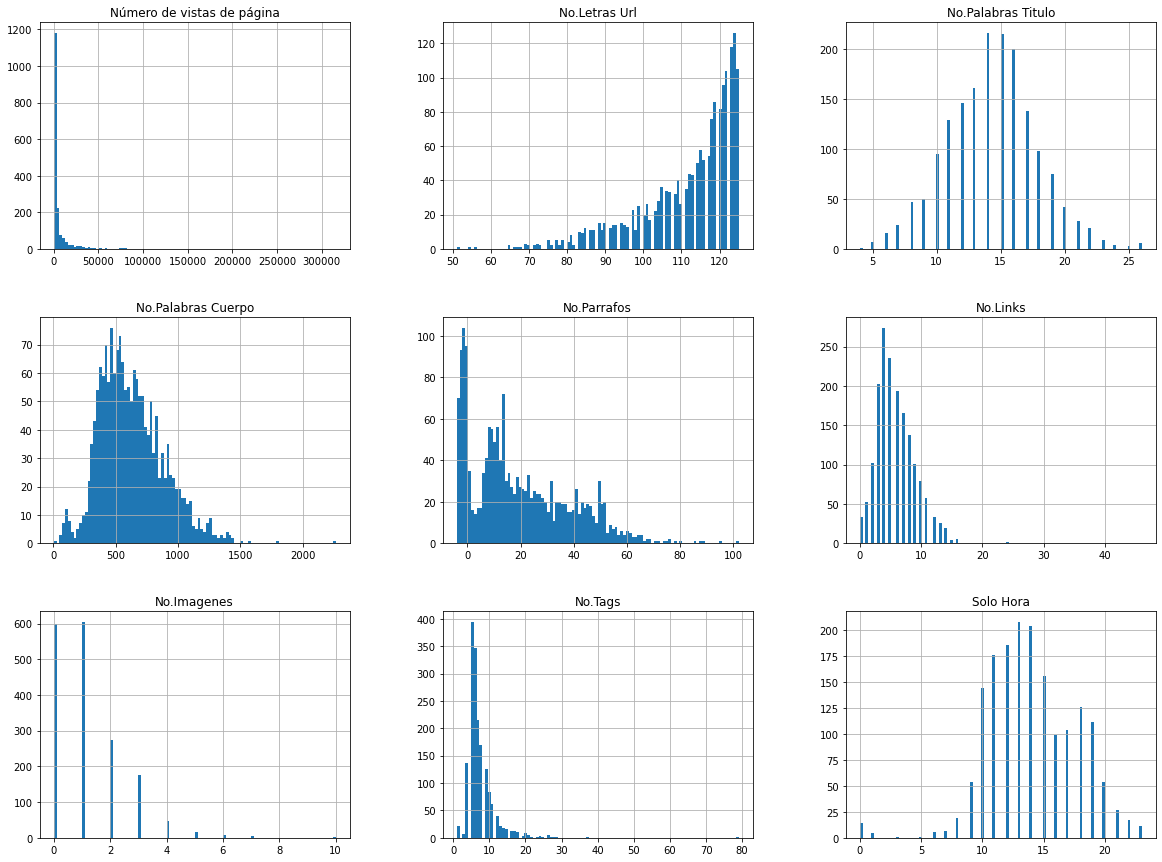

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
dfnotas.hist(bins=100, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [9]:
dfnotas
corr_matrix = dfnotas.corr()
corr_matrix['Número de vistas de página'].sort_values(ascending=False)

Número de vistas de página    1.000000
No.Palabras Titulo            0.125729
No.Letras Url                 0.113319
No.Imagenes                   0.056226
No.Links                      0.043593
Solo Hora                     0.037586
No.Tags                       0.017782
No.Palabras Cuerpo           -0.040582
No.Parrafos                  -0.098943
Name: Número de vistas de página, dtype: float64

Saving figure attribute_histogram_plots


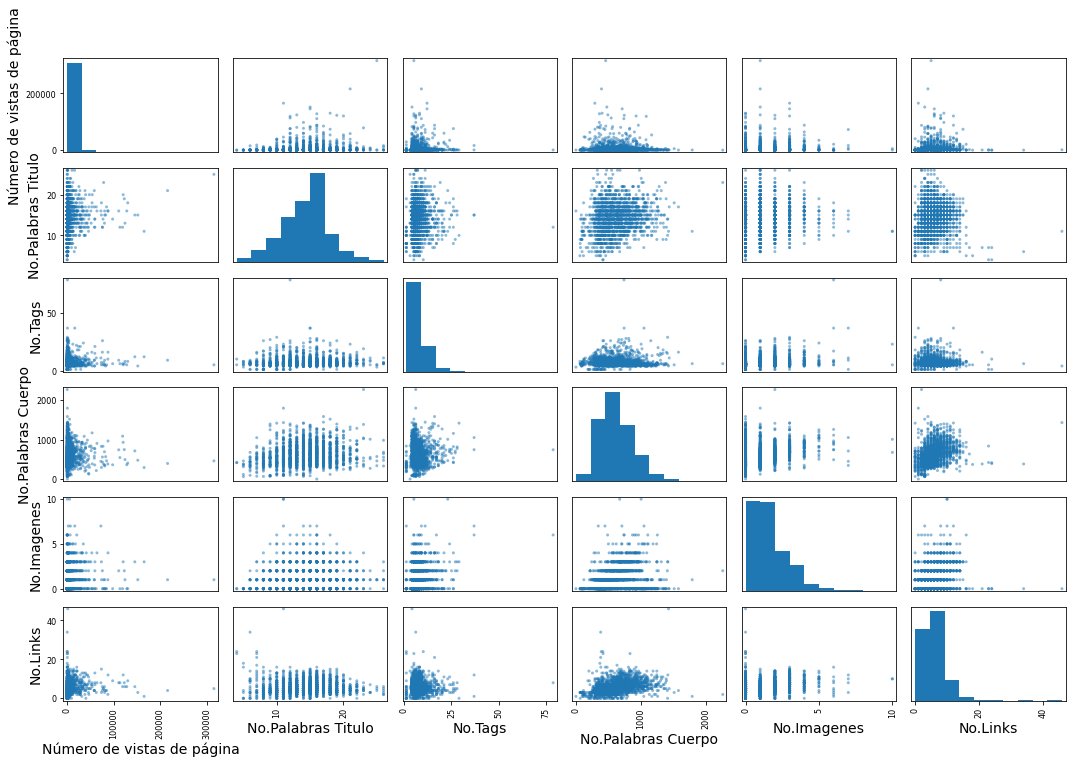

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["Número de vistas de página", "No.Palabras Titulo","No.Tags","No.Palabras Cuerpo","No.Imagenes","No.Links"]
scatter_matrix(dfnotas[attributes], figsize=(15, 10))
save_fig("attribute_histogram_plots")

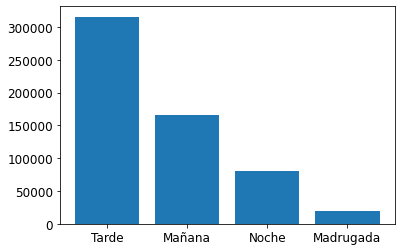

In [11]:
plt.bar( dfnotas['Horario de Publicacion'], dfnotas['Número de vistas de página'])
plt.show()


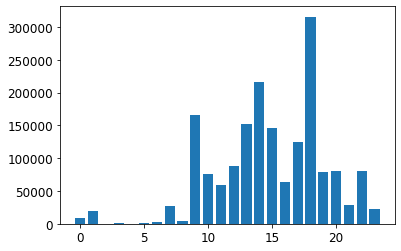

In [52]:
plt.bar( dfnotas['Solo Hora'], dfnotas['Número de vistas de página'])
plt.show()


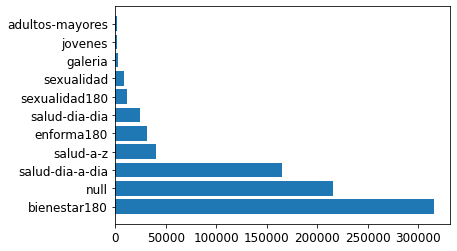

In [53]:
plt.barh( dfnotas['Topic'], dfnotas['Número de vistas de página'])
plt.show()


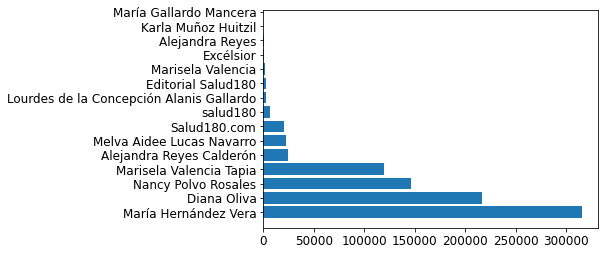

In [54]:
plt.barh( dfnotas['editor'], dfnotas['Número de vistas de página'])
plt.show()


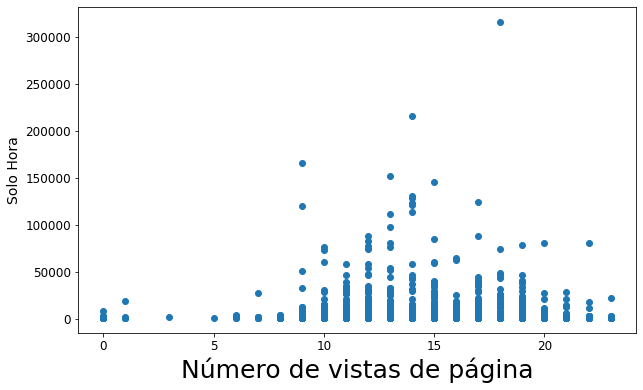

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

x_values = dfnotas["Solo Hora"].unique()

ax.scatter(x = dfnotas["Solo Hora"], y = dfnotas["Número de vistas de página"])
plt.xlabel("Número de vistas de página",fontsize=25)
plt.ylabel("Solo Hora")

plt.show()

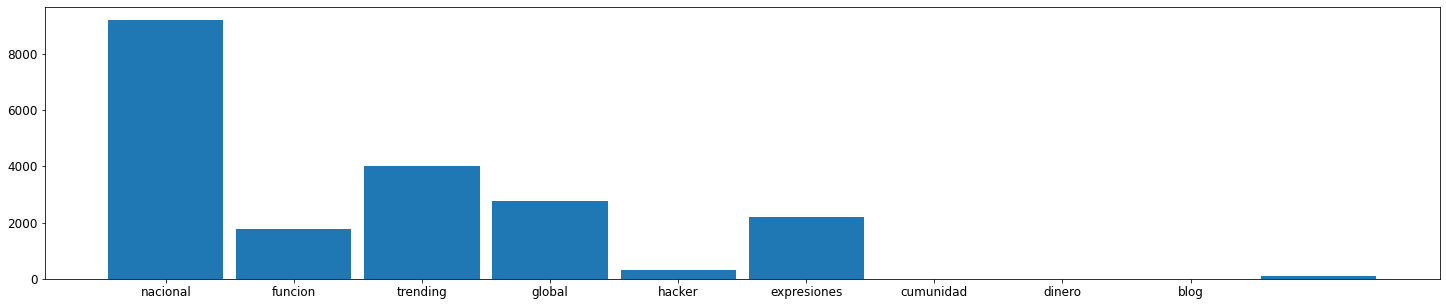

In [90]:
plt.rcParams["figure.figsize"] = (25, 5)
plt.xticks(np.arange(0.7, 12, step=1.4))
plt.hist( dfnotas['Topic'],rwidth=0.9)

plt.show()


In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dfnotas, test_size=0.2, random_state=42)

In [30]:
#test_set.head()

<AxesSubplot:>

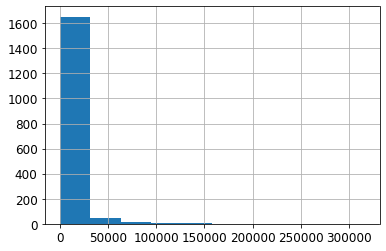

In [22]:
dfnotas["Número de vistas de página"].hist()

In [23]:

dfnotas["Calidad_Nota"] = np.ceil(dfnotas["Número de vistas de página"] / 1.5)

dfnotas["Calidad_Nota"].where(dfnotas["Calidad_Nota"] < 10000, 2, inplace=True)

In [24]:
dfnotas["Calidad_Nota"] = pd.cut(dfnotas["Número de vistas de página"],  #generamos los indices para clasificar las notas
                               bins=[0.,10000., np.inf],
                               labels=[1, 2])

In [25]:
dfnotas["Calidad_Nota"].value_counts()

1    1486
2     245
Name: Calidad_Nota, dtype: int64

<AxesSubplot:>

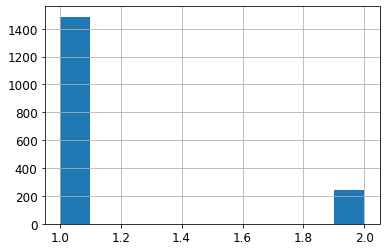

In [26]:
dfnotas["Calidad_Nota"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dfnotas, dfnotas["Calidad_Nota"]):
    strat_train_set = dfnotas.loc[train_index]
    strat_test_set = dfnotas.loc[test_index]

In [29]:
strat_test_set["Calidad_Nota"].value_counts() / len(strat_test_set)

1    0.85879
2    0.14121
Name: Calidad_Nota, dtype: float64

In [30]:
def income_cat_proportions(data):
    return data["Calidad_Nota"].value_counts() / len(data)

train_set, test_set = train_test_split(dfnotas, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(dfnotas),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [31]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.858463,0.85879,0.867435,1.045105,0.038011
2,0.141537,0.14121,0.132565,-6.338881,-0.230548


In [33]:
y_train, y_test = strat_train_set["Calidad_Nota"], strat_test_set["Calidad_Nota"]

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Calidad_Nota", axis=1, inplace=True)

# ENTRENAMIENTO DEL MODELO DE CLASIFICACION

In [ ]:
#notas = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
#housing_labels = strat_train_set["median_house_value"].copy()

In [119]:
entrenamiento= strat_train_set.copy() #Copio el date en uno nuevo para entrenar

In [120]:
y_train_buena = (y_train == 2)
y_test_buena = (y_test == 2)  #Busco las notas con clasificacion 2 (Buenas)

In [122]:
strat_test_set.head(3)

,sitio,created,title,Fecha,Hora,url,editor,tags,cuerpo,Número de vistas de página,...,No.Palabras_Cuerpo,No.Parrafos,No.Links,No.Imagenes,Vocabulario_Cuerpo,Tiene_Tags,No.Tags,Topic,Horario_de_Publicacion,Solo_Hora
769,salud180,"6 jul 2022, 15:49:11",Esta es la dolorosa enfermedad que acompañó a ...,2022-07-06,10:49:11,https://www.salud180.com/salud-dia-a-dia/esta-...,Marisela Valencia Tapia,_salud180_fibromialgia_Frida Kahlo_dolor gener...,"Frida Kahlo, todos hemos escuchado sobre esta ...",1862.0,...,638,31,7,2,"{generalizado, dio, &, como, Kahlo, crónico, m...",Si,14,salud-dia-a-dia,Mañana,10
1262,salud180,"9 jun 2022, 22:05:03",Rutina de belleza de Anne Hathaway con la que ...,2022-06-09,17:05:03,https://www.salud180.com/bienestar180/rutina-d...,Nancy Polvo Rosales,_cómo cuida su piel Anne Hathaway_cuál es la r...,"Además de hermosa y talentosa, Anne Hathaway e...",593.0,...,910,0,11,2,"{deberá, piel, vaya, convertirse, reciente, se...",Si,6,bienestar180,Tarde,17
1011,salud180,"25 may 2022, 19:23:05",4 razones por las que se marchitan las plantas...,2022-05-25,14:23:05,https://www.salud180.com/salud-dia-a-dia/galer...,Nancy Polvo Rosales,_por qué se marchitan las plantas_cómo saber s...,Todas las plantas requieren de cuidados básico...,1114.0,...,429,-3,9,0,"{cierta, gran, natural, como, raíces, ambienta...",Si,9,salud-dia-a-dia,Tarde,14


In [123]:
entrenamiento=entrenamiento.drop(['Mas_Frecuentes_Titulo','sitio','created','title','Fecha','Hora','url','editor','tags','cuerpo','Vocabulario_Cuerpo','Número de vistas de página','Tiene_Tags', 'Topic','Horario_de_Publicacion'], axis=1)
entrenamiento.head(3) #Elimino atributos de texto, para hacer pruebas de momento

,No.Letras_Url,No.Palabras_Titulo,No.Palabras_Cuerpo,No.Parrafos,No.Links,No.Imagenes,No.Tags,Solo_Hora
276,121,15,742,-1,5,2,10,16
759,125,19,571,44,4,1,15,6
1629,91,10,605,11,8,1,5,20


In [124]:
entrenamiento=entrenamiento.to_numpy() #Convierto el dt a un array

In [125]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(entrenamiento, y_train_buena) #se entrena el modela

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [127]:
prueba= strat_test_set.copy() #copio el set de test para evalar

In [128]:
prueba=prueba.drop(['Mas_Frecuentes_Titulo','sitio','created','title','Fecha','Hora','url','editor','tags','cuerpo','Vocabulario_Cuerpo','Número de vistas de página','Tiene_Tags', 'Topic','Horario_de_Publicacion'], axis=1)
prueba.head(3) #elimino atributos de texto

,No.Letras_Url,No.Palabras_Titulo,No.Palabras_Cuerpo,No.Parrafos,No.Links,No.Imagenes,No.Tags,Solo_Hora
769,114,16,638,31,7,2,14,10
1262,111,15,910,0,11,2,6,17
1011,125,16,429,-3,9,0,9,14


In [129]:
prueba=prueba.to_numpy()
prueba #se convierte en array

array([[ 114,   16,  638, ...,    2,   14,   10],
       [ 111,   15,  910, ...,    2,    6,   17],
       [ 125,   16,  429, ...,    0,    9,   14],
       ...,
       [ 118,   14, 1134, ...,    0,    5,   18],
       [ 114,   14, 1114, ...,    0,    6,   10],
       [ 116,   13,  422, ...,    0,    5,   17]], dtype=int64)

In [166]:
some_digit=entrenamiento[8]
entrenamiento[8] #Vuelvo la instacion de prueba en un array

array([122,  17, 589,   0,   8,   3,   9,  18], dtype=int64)

In [132]:
#some_digit=some_digit.reshape(1, -1) #preparo el dato para probar en el modelo

In [164]:
for i in range(0,len(prueba)):
    some_digit=prueba[i]
    some_digit=some_digit.reshape(1,-1)
    if sgd_clf.predict(some_digit):
        print(i , " :",sgd_clf.predict(some_digit))


92  : [ True]
123  : [ True]
176  : [ True]
201  : [ True]
225  : [ True]
233  : [ True]
292  : [ True]


In [139]:
print(prueba[92])


[104  14  73   0   3   0   6  14]


In [135]:
print(prueba[123])

[83  5 64 -1  3  0  8 13]


In [136]:
print(prueba[176])

[87  8 69 -1  0  0  6 10]


In [137]:
print(prueba[201])

[105  10 119  -1   3   0   6  11]


In [150]:
strat_test_set.head(177)

,sitio,created,title,Fecha,Hora,url,editor,tags,cuerpo,Número de vistas de página,...,No.Palabras_Cuerpo,No.Parrafos,No.Links,No.Imagenes,Vocabulario_Cuerpo,Tiene_Tags,No.Tags,Topic,Horario_de_Publicacion,Solo_Hora
769,salud180,"6 jul 2022, 15:49:11",Esta es la dolorosa enfermedad que acompañó a ...,2022-07-06,10:49:11,https://www.salud180.com/salud-dia-a-dia/esta-...,Marisela Valencia Tapia,_salud180_fibromialgia_Frida Kahlo_dolor gener...,"Frida Kahlo, todos hemos escuchado sobre esta ...",1862.0,...,638,31,7,2,"{generalizado, dio, &, como, Kahlo, crónico, m...",Si,14,salud-dia-a-dia,Mañana,10
1262,salud180,"9 jun 2022, 22:05:03",Rutina de belleza de Anne Hathaway con la que ...,2022-06-09,17:05:03,https://www.salud180.com/bienestar180/rutina-d...,Nancy Polvo Rosales,_cómo cuida su piel Anne Hathaway_cuál es la r...,"Además de hermosa y talentosa, Anne Hathaway e...",593.0,...,910,0,11,2,"{deberá, piel, vaya, convertirse, reciente, se...",Si,6,bienestar180,Tarde,17
1011,salud180,"25 may 2022, 19:23:05",4 razones por las que se marchitan las plantas...,2022-05-25,14:23:05,https://www.salud180.com/salud-dia-a-dia/galer...,Nancy Polvo Rosales,_por qué se marchitan las plantas_cómo saber s...,Todas las plantas requieren de cuidados básico...,1114.0,...,429,-3,9,0,"{cierta, gran, natural, como, raíces, ambienta...",Si,9,salud-dia-a-dia,Tarde,14
1196,salud180,"18 jul 2022, 16:20:18",Cómo quitar las manchas de cloro en la ropa si...,2022-07-18,11:20:18,https://www.salud180.com/salud-dia-a-dia/galer...,Diana Oliva,_consejos limpieza_tips limpieza_hogar_limpiez...,El cloro es el desinfectante por excelencia de...,741.0,...,617,13,6,1,"{pequeño, como, oscuro, Quita, sufrimos, a, so...",Si,9,salud-dia-a-dia,Mañana,11
1125,salud180,"12 may 2022, 17:47:40","Escamas de piel, bacterias y otras cosas que v...",2022-05-12,12:47:40,https://www.salud180.com/salud-dia-a-dia/escam...,Diana Oliva,_polvo_pelo mascota_consejos limpieza_tips lim...,Acariciar a nuestra mascota —introduciendo los...,855.0,...,527,7,4,1,"{crear, colchones, heces, mascota, quiere, com...",Si,10,salud-dia-a-dia,Tarde,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,salud180,"22 sept 2022, 20:49:03",Temblores emocionales: cómo mantener la calma ...,2022-09-22,15:49:03,https://www.salud180.com/salud-dia-a-dia/tembl...,Alejandra Reyes Calderón,_temblores emocionales_qué son los temblores e...,Otro sismo en 19 de septiembre y ahora las rép...,74.0,...,644,2,0,2,"{Consejo, CDMX, whats, En, necesitas, son, Hay...",Si,5,salud-dia-a-dia,Tarde,15
807,salud180,"29 jun 2022, 16:50:49",Cómo hacer un suavizante de ropa exprés si se ...,2022-06-29,11:50:49,https://www.salud180.com/bienestar180/como-hac...,Marisela Valencia Tapia,_consejos limpieza_tips limpieza_hogar,Los suavizantes son un básico para mantener nu...,1708.0,...,920,58,8,0,"{actúa, piel, seca, Revuelve, irritantes, nece...",Si,4,bienestar180,Mañana,11
1205,salud180,"27 jul 2022, 19:35:04",8 preguntas sobre viruela del mono respondidas...,2022-07-27,14:35:04,https://www.salud180.com/salud-dia-a-dia/8-pre...,Diana Oliva,_viruela del mono_preguntas sobre viruela del ...,A medida que el virus de la viruela del mono (...,706.0,...,781,-2,2,0,"{analizando.Con, piel, Jalisco, Secretaría, CD...",Si,20,salud-dia-a-dia,Tarde,14
1512,salud180,"1 jun 2022, 23:10:28",La razón por la que olvidas las cosas a los 20...,2022-06-01,18:10:28,https://www.salud180.com/nutricion-y-ejercicio...,Salud180.com,_mala memoria_dolor de cabeza_olvidar cosas,Es normal que de pronto tengamos pequeños olvi...,185.0,...,709,35,0,0,"{corto, vaya, información, cuenta, dificultad,...",Si,4,null,Tarde,18


In [154]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, entrenamiento, y_train_buena, cv=3, scoring="accuracy")

array([0.73593074, 0.14099783, 0.84164859])

In [156]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, entrenamiento, y_train_buena, cv=3)

In [157]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_buena, y_train_pred)

array([[712, 476],
       [115,  81]], dtype=int64)

In [158]:
y_train_perfect_predictions = y_train_buena

In [159]:
confusion_matrix(y_train_buena, y_train_perfect_predictions)

array([[1188,    0],
       [   0,  196]], dtype=int64)

In [160]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_buena, y_train_pred)

0.14542190305206462

In [ ]:
recall_score(y_train_buena, y_train_pred)

0.413265306122449

In [162]:
from sklearn.metrics import f1_score
f1_score(y_train_buena, y_train_pred)

0.21513944223107567